In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# для отображения большего количества колонок 
pd.set_option('display.max_columns', 30)
# прячем предупреждение SettingWithCopyWarning
pd.options.mode.chained_assignment = None  

df = pd.read_csv("/datasets/real_estate_data.csv", delimiter  = "\t")
print(df.info())
df[df["rooms"] == 0].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


### Вывод

#### В полученной выгрузке видим частичное отсутствие данных в некоторых колонках и несовпадение типов между реальным и предполагаемым по смыслу колонки. Так например в колонке first_day_exposition при парсинге данных неправильно распознался тип колонки, а отсутствующие данные в колонке balcony можно заполнить по смыслу.  
#### В выгрузке множество колонок которые можно обработать и добавить в них данных, например заполнить ponds_nearest на основе ponds_around3000, однако эти колонки не участвуют в финальных расчетах, поэтому их можно пропустить.

### Шаг 2. Предобработка данных

In [2]:
# Перед началом основной работы необходимо обработать пропущенные данные (к примеру необязательные поля при создании заявки на сайте)
# А также привести типы данных в колонке к удобному для дальнейших расчетов


# для поля is_appartment приведем значения к булевому типу, 
# также будем считать пропущенные значения как false, (аппартаменты нечастый тип недвижимости и имеет свои особенности
# вероятней всего пользователь укажет подобный нюанс в объявлении)
df["is_apartment"] = df["is_apartment"].fillna(False)

# в случае если поле с балконом не заполенно - вероятней всего балконов в квартире нет, и можно заполнить отсутствующее
# значение нулями
df["balcony"] = df["balcony"].fillna(0)

# в случае, если общее количество этажей не указано заполняем их значение нулями,
# т.к. в финальных вопросах этот параметр не критичный
df["floors_total"] = df["floors_total"].fillna(0)

# т.к.last_price и floors_total приведем к целочисленному типу, т.к. не бывает дробных этажей,
# а цену можно округлить до рублей
df["last_price"] = df["last_price"].astype(int)
df["floors_total"] = df["floors_total"].astype(int)

# is_apartment используется как булевое значение, приведем к булевому типу. С помощью этой операции мы сможем использовать поле в дальнейшей работе.
df["is_apartment"] = df["is_apartment"].astype(bool)

# приведем из типа object к типу даты first_day_exposition.
# Используя правильный тип колонки мы сможем подробно изучить продажи в конкретные месяца и дни недели
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"])


print(df.info())
df.head()

# избавимся от крайних и подозрительных значений
# print(df.shape[0])
# df = df.query('ceiling_height < 10 and last_price >= 430000 and rooms > 0')
# проверим, что не срезали слишком много
# print(df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Шаг 3. Посчитайте и добавьте в таблицу

In [3]:
# получим цену за квадратный метр
df["square_meter_price"] = df["last_price"] / df["total_area"]

# получим день недели, месяц и выделим под них колонки
# при необходимости можно выделить day_name для дней недели, 
# однако с численным представлением легче строить графики в дальнейшем
df['weekday'] = df['first_day_exposition'].dt.weekday
# df['weekday'] = df['first_day_exposition'].dt.day_name()
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

# получим отношение жилой площади и площади кухни к основной 
df["living_to_total"] = df["living_area"] / df["total_area"]
df["kitchen_to_total"] = df["kitchen_area"] / df["total_area"]

# функция для получения типа этажа
def setFloor(item):
    if item["floor"] == 1:
        return "первый"
    elif item["floor"] == item["floors_total"]:
        return "последний"
    else:
        return "другой"

# получим типы этажа
df['floor_type'] = df.apply(lambda row: setFloor(row), axis=1)

print(df.head())
print(df.info())
    

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70            16         51.0      8         False   False   
1             NaN            11         18.6      1         False   False   
2             NaN             5         34.3      4         False   False   
3             NaN            14          NaN      9         False   False   
4            3.03            14         32.0     13         False   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      0.0 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

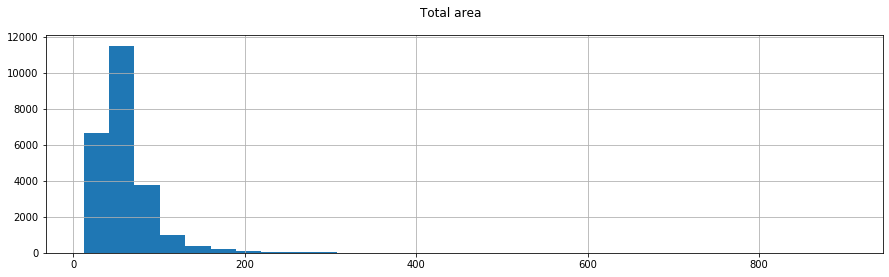

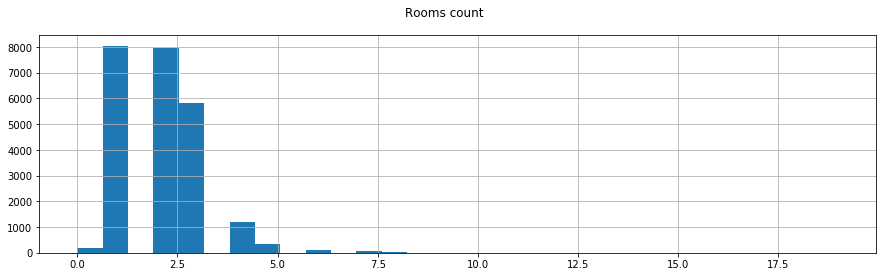

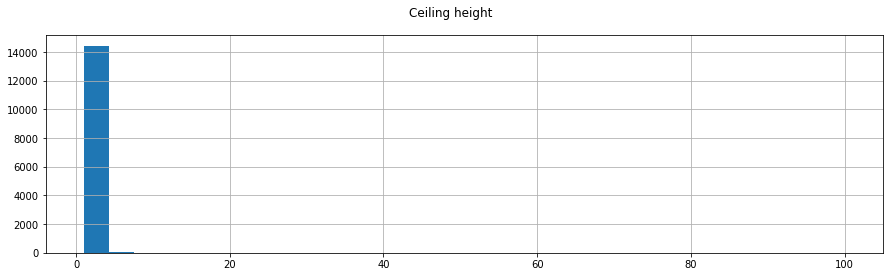

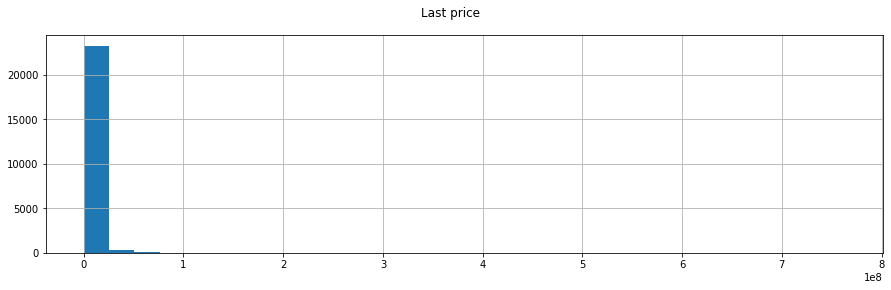

In [4]:
def draw_hist_plot(data, plot_title, max_value):
    if max_value == 0: 
        data.hist(bins=30, figsize=(15,4))
    else:
        data.hist(bins=30, range=(0, max_value), figsize=(15,4))
    plt.suptitle(plot_title, fontsize='large')
    plt.show()

draw_hist_plot(df["total_area"], "Total area", 0)
draw_hist_plot(df["rooms"], "Rooms count", 0)
draw_hist_plot(df["ceiling_height"], "Ceiling height", 0)
draw_hist_plot(df["last_price"], "Last price", 0)

Полученные гистограммы сложно назвать информативными, хорошо видно, что часть значений сильно выбивается за пределы нормы, а в части вероятно присутствуют ошибочные данные. \
Например в колонке ceiling_height присутствуют потолки под 100 метров. Вероятно, данные близкие к 100 метрам появились в результате ошибочного заполнения, также как и 20 - 25 метров (по всей видимости, пользователь не добавил точку при заполнении).  Ограничим максимальную высоту в 4 метра, а минимальную - 2 \
Также для гистограммы last_price сложно проанализировать среднее распределение цен из-за слишком высокой стоимостьи жилья для части квартир. В данном случае ограничим для гистограммы цену до 20.000.000 \
В гистограмме rooms заметим, что в небольшой части квартир число комнат равно 0. Избавимся от этих значений. Для гистограммы ограничим максимальное значение комнат до 8 \
В гистограмме total_area ограничим максимальное значение до 300 

Количество строк до обрезки 23699
Количество строк после обрезки 23443


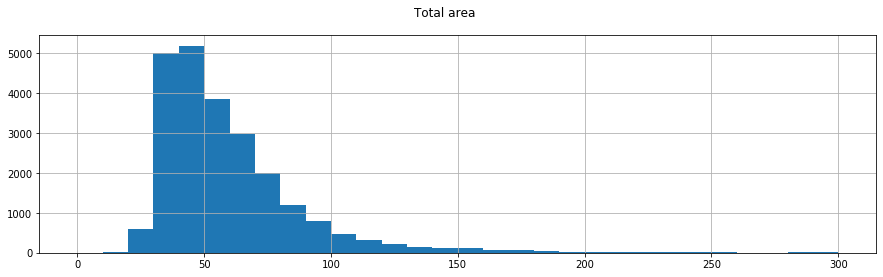

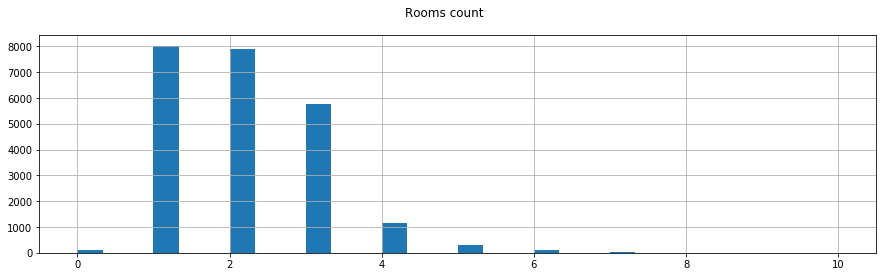

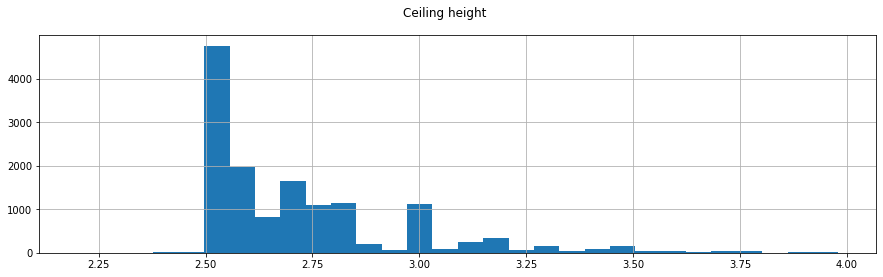

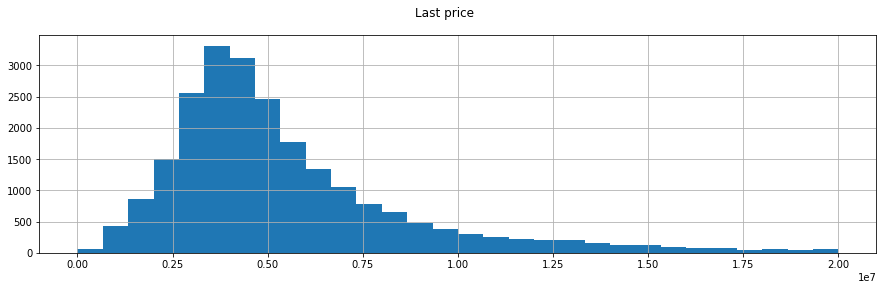

In [5]:
# Избавимся от крайних и подозрительных значений
print("Количество строк до обрезки", df.shape[0])
df = df.query('rooms < 8 and rooms > 0 and total_area < 300 and ((ceiling_height < 4) and (ceiling_height > 2)) or (ceiling_height != ceiling_height)')
# проверим, что не срезали слишком много
print("Количество строк после обрезки", df.shape[0])

# Снова построим гистограммы после редактирования данных, посмотрим как они изменятся
draw_hist_plot(df["total_area"], "Total area", 300)
draw_hist_plot(df["rooms"], "Rooms count", 10)
draw_hist_plot(df["ceiling_height"], "Ceiling height", 0)
draw_hist_plot(df["last_price"], "Last price", 20000000)

После преобразований легко проанализировать полученные данные. \
Наиболее часто в объявлениях можно встретить квартиры с площадью 50 метров, одно или двухкомнатные, с высотой потолка в 2,5 метра и ценой от 3 до 5 миллионов рублей.

Среднее значение по колонке days_exposition: 180.42935906271538
Среднее значение по колонке days_exposition: 95.0


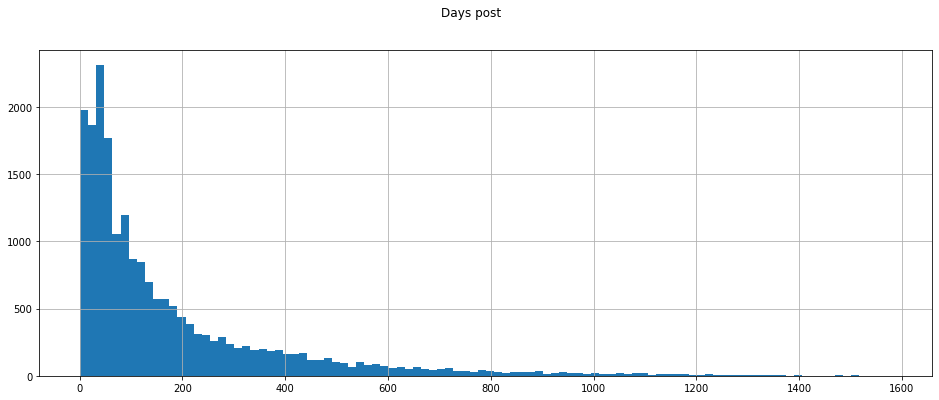

In [6]:

# выведем средние и медианные данные по колонке days_exposition
print("Среднее значение по колонке days_exposition:", df["days_exposition"].mean())
print("Среднее значение по колонке days_exposition:", df["days_exposition"].median())

plt.suptitle('Days post')
df["days_exposition"].hist(figsize=(16, 6), bins=100)
plt.show()


Cогласно графику видим - что в среднем объявление снимают по прошествию 200 дней, довольно часты случаи, когда объявление находится на сайте от 200 до 800 дней и совсем уж редко свыше 800 дней

In [7]:
# посчитаем корреляции для цены относительно общей площади, количества комнат и удаленности от центра
print("Корреляция между площадью и ценой:", df["total_area"].corr(df["last_price"]))
print("Корреляция между числом комнат и ценой:", df["rooms"].corr(df["last_price"]))
print("Корреляция между отдаленностью от центра и ценой:", df["cityCenters_nearest"].corr(df["last_price"]))
print("Построим сводную таблицу по каждому из типов этажей:")
print(pd.pivot_table(df, values='last_price', index='floor_type').sort_values(by='floor_type'))

Корреляция между площадью и ценой: 0.6074752704812997
Корреляция между числом комнат и ценой: 0.34090657432723004
Корреляция между отдаленностью от центра и ценой: -0.21144313886761978
Построим сводную таблицу по каждому из типов этажей:
              last_price
floor_type              
другой      6.546188e+06
первый      4.722620e+06
последний   6.743169e+06


- Корреляция между площадью и ценой довольно высока, что видится логичным 
- Корреляция между числом комнат и ценой тоже существует, хоть и не такая значительная. 
- Корреляция между отдаленностью от центра и ценой отрицательная, однако это ожидаемо. Чем меньше значение в колонке cityCenters_nearest тем цена выше, т.е. цена вырастает по мере приближению к центру 

Построив сводную таблицу по средней цене в зависимости от этажа заметим значительное снижение стоимости квартиры, в случае если она располагается на первом этаже, и чуть менее значительное, но тоже заметное, если на последнем. \
Однако стоит помнить, что в нашей выборке присутствует жилье, которое состоит из двух-трех этажей. Обычно это старые, недорогие дома, и квартиры в них согласно нашей логике будут либо на первом либо на последнем этаже попробуем получить сводную таблицу за исключением этих типов домов и сравним результаты

In [8]:
df_without_first_3_floors = df.query("(floors_total > 3) or (floors_total != floors_total)")
print(pd.pivot_table(df_without_first_3_floors, values='last_price', index='floor_type').sort_values(by='floor_type'))


              last_price
floor_type              
другой      6.557758e+06
первый      4.874931e+06
последний   7.035720e+06


Получим схожую картину, но с меньшим отрывом в цене

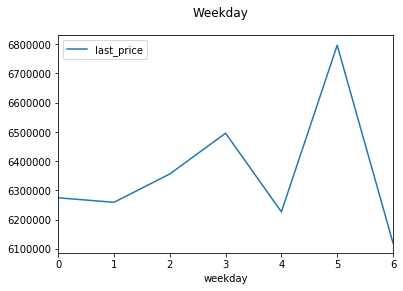

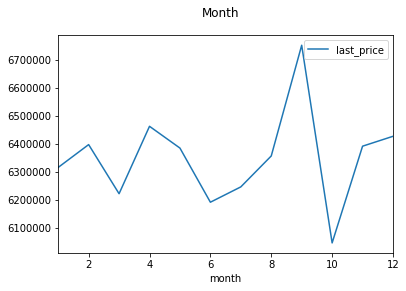

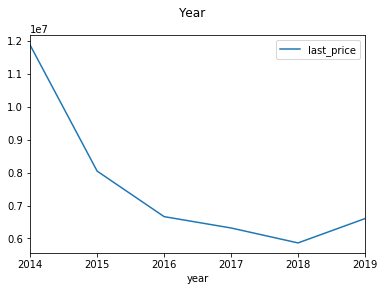

In [9]:
# функция построения графика по pivot_table
def draw_plot_by_pivot_data(df, values, column, title):
    pd.pivot_table(df, values=values, index=column).plot()
    plt.suptitle(title, fontsize='large')
    plt.show()

# получим графики продаж для дней недели, месяцев, годов
draw_plot_by_pivot_data(df, 'last_price','weekday', 'Weekday')
draw_plot_by_pivot_data(df, 'last_price','month', 'Month')
draw_plot_by_pivot_data(df, 'last_price','year', 'Year')


Наиболее часто дорогое жилье выкладывают на сайт в выходные дни \
По графику заметим спад в цене в летние месяца, а в сентябре и конце года стоимость резко подскакивает \
Заметим, что начале запуска системы 2014 - 2015 год, когда сервис был менее популярен на сайте в основном публиковали дорогое жилье, в дальнейшем видим более плавный график цены с небольшим увеличением для 2019 года

Список 10 самых популярных местностей, отсортированных по цене на квадратный метр
                   square_meter_price
locality_name                        
Выборг                   58250.660654
Всеволожск               68563.864824
Гатчина                  68811.372828
Колпино                  75424.579098
посёлок Шушары           78655.592167
посёлок Мурино           85696.571504
посёлок Парголово        90175.913458
деревня Кудрово          92412.495592
Пушкин                  102777.293778
Санкт-Петербург         114269.391117


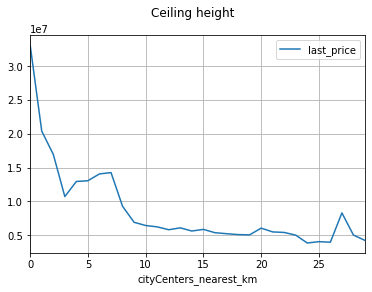

График резко меняется дважды, на 8 и 3 км.
Возьмем точку центра города как 8 км, т.к. это первое резкое изменение цены


In [10]:
# получим названия 10 местностей с наибольшим числом объявлений 
top_10_by_locality_name = df["locality_name"].value_counts().sort_values(ascending = False).head(10).index

# получим датафрейм, в котором местности входит в 10 самых популярных
print('Список 10 самых популярных местностей, отсортированных по цене на квадратный метр')
top_10_by_locality_data = df.query('locality_name in @top_10_by_locality_name')
print(pd.pivot_table(top_10_by_locality_data, values='square_meter_price', index='locality_name')
      .sort_values(by='square_meter_price'))

# получим датафрейм с объявленияим из Санкт-Петербурга и выделим в нем отдельную колонку 
# с расстоянием от центра измеряемого в километрах
spb_flats = df[df["locality_name"] == "Санкт-Петербург"]
spb_flats["cityCenters_nearest_km"] = spb_flats["cityCenters_nearest"] / 1000
spb_flats["cityCenters_nearest_km"] = spb_flats["cityCenters_nearest_km"].round()
# график зависимости цены от расстояния до центра
pd.pivot_table(spb_flats, values='last_price', index='cityCenters_nearest_km').plot(grid = True)
plt.suptitle('Ceiling height', fontsize='large')
plt.show()
print("График резко меняется дважды, на 8 и 3 км.")
print("Возьмем точку центра города как 8 км, т.к. это первое резкое изменение цены")
# корреляции между площади жилья, расстояния до центра и общей площадью
spb_flats_center = spb_flats[spb_flats["cityCenters_nearest_km"] < 8]


График резко меняется дважды, на 8 и 3 км. \
Будем считать центральной частью зону в 8 км от центра

In [11]:
print("Корреляция между площадью и ценой для центра Санкт-Петербурга:", spb_flats_center["total_area"]
      .corr(spb_flats_center["last_price"]))
print("Корреляция между числом комнат и ценой для центра Санкт-Петербурга:", spb_flats_center["rooms"]
      .corr(spb_flats_center["last_price"]))
print("Корреляция между удаленностью от центра и ценой для центра Санкт-Петербурга:", spb_flats_center["cityCenters_nearest"]
      .corr(spb_flats_center["last_price"]))


Корреляция между площадью и ценой для центра Санкт-Петербурга: 0.565152077705904
Корреляция между числом комнат и ценой для центра Санкт-Петербурга: 0.2824325175252883
Корреляция между удаленностью от центра и ценой для центра Санкт-Петербурга: -0.050354103589079456


Заметим, что корреляция цены между параметрами количества комнат и площади в целом ниже чем по городу в целом \
И значительно ниже для отношений между параметрами удаленности от центра и ценой. Видимо сам факт нахождения в центральной части уже достаточен для высокой цены

### Шаг 5. Общий вывод

1) Для квартир находящихся в центре - само расположение является важным элементов ценообразования. Такие квартиры гораздо меньше зависят от площади и числа комнат, чем квартиры в черте города \
2) Самое дешевое жилье как правило располагается на первом этаже, жиль чуть подороже на последнем и самое дорогое между ними \
3) Самое дорогое жилье обычно выставляют в выходные дни, в сентябре и конце года. \
4) Наиболее дорогое жилье Санкт Петербурга находится внутри 8 киломметровой зоны от центра города. \
5) В среднем объявление висит на сайте до 200 дней, в редких случаях объявление может задержаться и более 800 дней